In [35]:
import os

import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import seaborn as sns
import torch

# Load spatail prior

In [39]:
def get_spatial_matrix(path="./model/prior_array.mat", fore_map=None):
    if fore_map is None:
        fore_map = [5, 6, 7, 11, 12, 13, 14, 15, 16, 17, 18]
    # print("get_spatial_matrix")
    sprior = sio.loadmat(path)
    sprior = sprior["prior_array"]
    # print("sprior shaps =", sprior.shape)
#     foreground_map = [5, 6, 7, 11, 12, 13, 14, 15, 16, 17, 18]
    n = len(fore_map)
    sprior = sprior[fore_map]
#     tensor_sprior = torch.tensor(sprior).unsqueeze(0)
#     interp = torch.nn.Upsample(size=(70, 70), align_corners=False, mode='bilinear')
#     tensor_sprior = interp(tensor_sprior).squeeze()
#     tensor_sprior = tensor_sprior.squeeze()
#     sprior = tensor_sprior.data.numpy()
#     tensor_sprior = torch.tensor(sprior,
#                                  dtype=torch.float64,
#                                  device=torch.device('cuda:0')).float().cuda()
#     return tensor_sprior
    return sprior

In [40]:
fore_map = [5, 6, 7, 11, 12, 13, 14, 15, 16, 17, 18]

In [41]:
sp_prior = get_spatial_matrix(fore_map=list(range(19)))

In [42]:
sp_prior.shape

(19, 1024, 2048)

In [43]:
class_names = ["road", "sidewalk", "building", 
               "wall", "fence", "pole", "light", 
               "sign", "vegetation", "terrain", 
               "sky", "person", "rider",
               "car", "truck", "bus",
               "train", "motocycle", "bicycle"
              ]

In [8]:
type(sp_prior)

numpy.ndarray

In [9]:
sp_prior[0]

array([[1.27586055e-10, 1.28008434e-10, 1.28953298e-10, ...,
        1.41030937e-10, 1.40259978e-10, 1.38965377e-10],
       [1.28799767e-10, 1.29298155e-10, 1.30273875e-10, ...,
        1.42457467e-10, 1.41621823e-10, 1.40413849e-10],
       [1.30412979e-10, 1.30962749e-10, 1.31942068e-10, ...,
        1.44345813e-10, 1.43445885e-10, 1.42323745e-10],
       ...,
       [5.89254557e-08, 5.88533947e-08, 5.87692603e-08, ...,
        2.11942040e-08, 2.13935394e-08, 2.15572261e-08],
       [5.88376992e-08, 5.87603315e-08, 5.86712071e-08, ...,
        1.98849190e-08, 2.00507598e-08, 2.01863081e-08],
       [5.87561688e-08, 5.86748564e-08, 5.85823526e-08, ...,
        1.88409246e-08, 1.89788504e-08, 1.90909341e-08]])

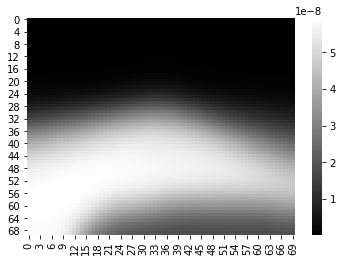

In [15]:
heatmap = sns.heatmap(sp_prior[0], cmap="gray") # 生成熱力圖
heatmap

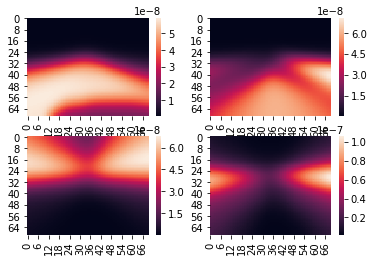

In [11]:
fig = plt.figure()
fig.add_subplot(2, 2, 1)
sns.heatmap(sp_prior[0]) # 生成熱力圖
fig.add_subplot(2, 2, 2)
sns.heatmap(sp_prior[1]) # 生成熱力圖
fig.add_subplot(2, 2, 3)
sns.heatmap(sp_prior[2]) # 生成熱力圖
fig.add_subplot(2, 2, 4)
sns.heatmap(sp_prior[3]) # 生成熱力圖

In [12]:
np.amax(sp_prior[0])

5.945343735716312e-08

In [11]:
np.amin(sp_prior[0])

1.2133711208967104e-10

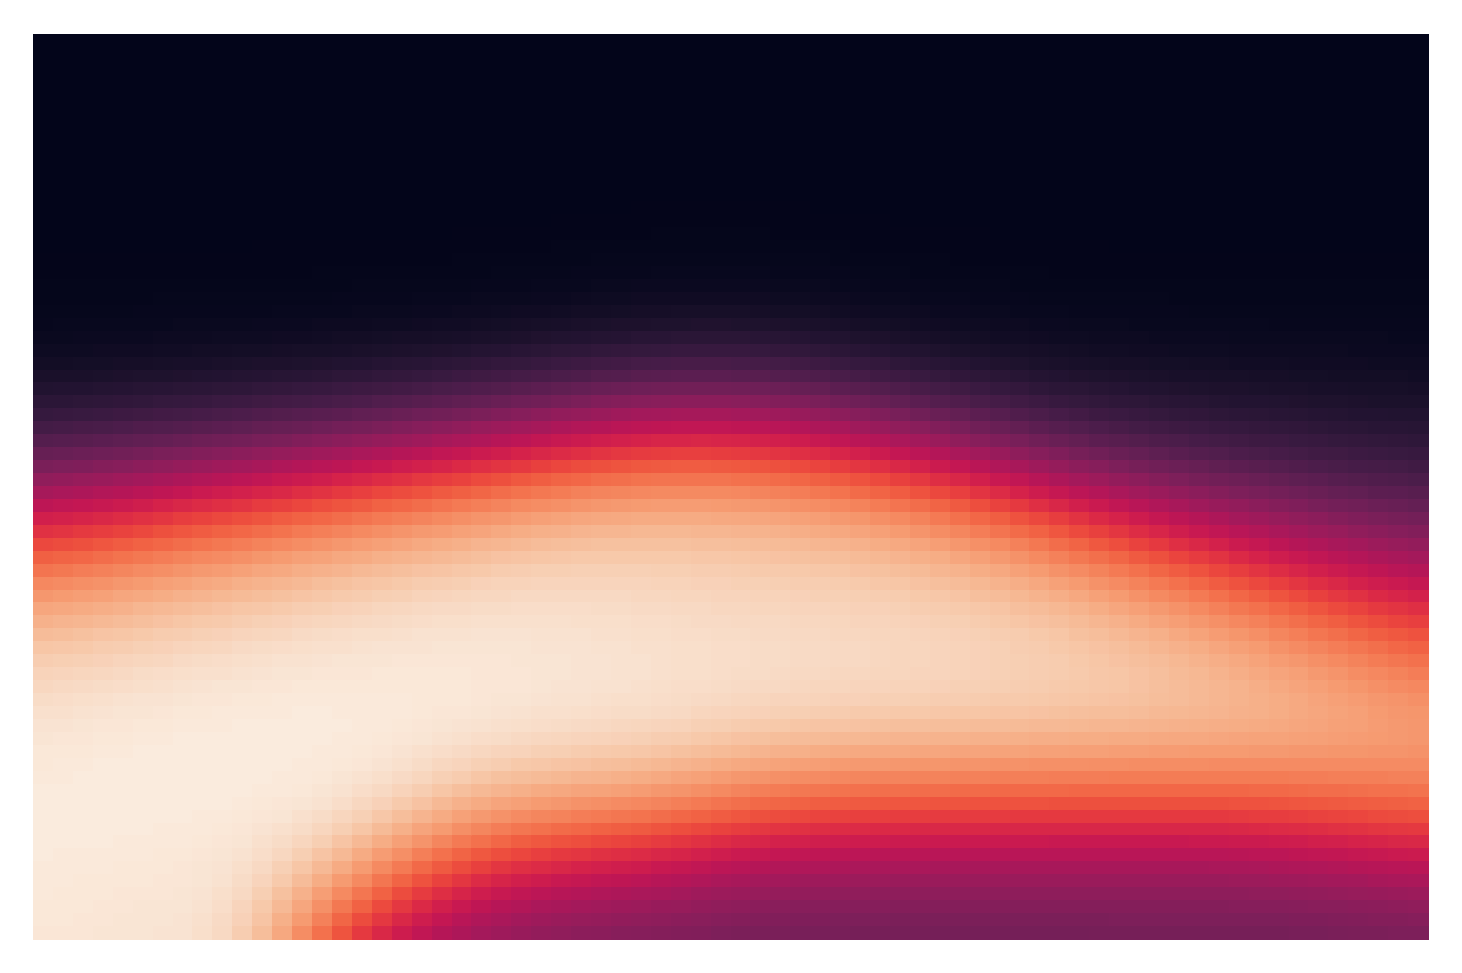

In [26]:
fig = plt.figure(dpi = 300)
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(sp_prior[0], cbar=False) # 生成熱力圖
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
# ax.legend().set_visible(False)


In [19]:
SAVE_DIR = "./spatial-prior"
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

In [20]:
sp_prior = sp_prior[fore_map]

In [21]:
class_names = [[cls_name for idx, cls_name in enumerate(class_names) if idx in fore_map]]

In [22]:
color_map = "gray"

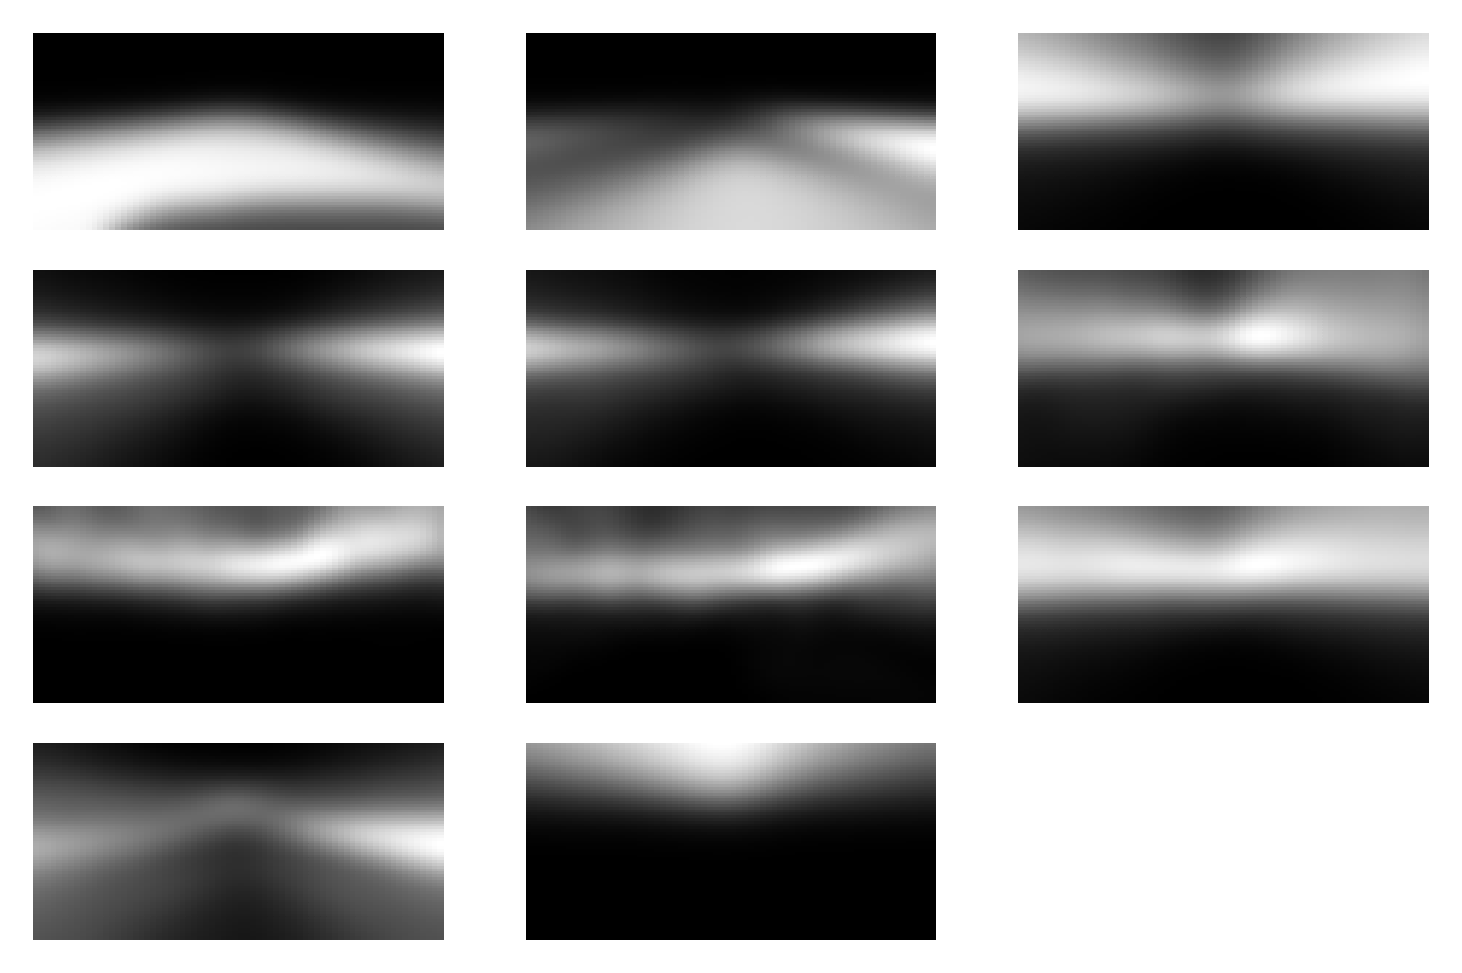

In [28]:
fig = plt.figure(dpi = 300)
for i in range(len(fore_map)):
#     print("num_classes %d amax = %s" % (i, np.amax(sp_prior[i])))
#     print("num_classes %d amin = %s" % (i, np.amin(sp_prior[i])))
    ax = fig.add_subplot(4, 3, i+1)
#     sns.heatmap(sp_prior[i]) # 生成熱力圖
    sns.heatmap(sp_prior[i], cbar=False, cmap=color_map) # 生成熱力圖 不要右邊的value bar
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
#     ax.set_title(class_names[i])
fig.savefig(os.path.join(SAVE_DIR, "foreground_class_%s.png" % (color_map)))

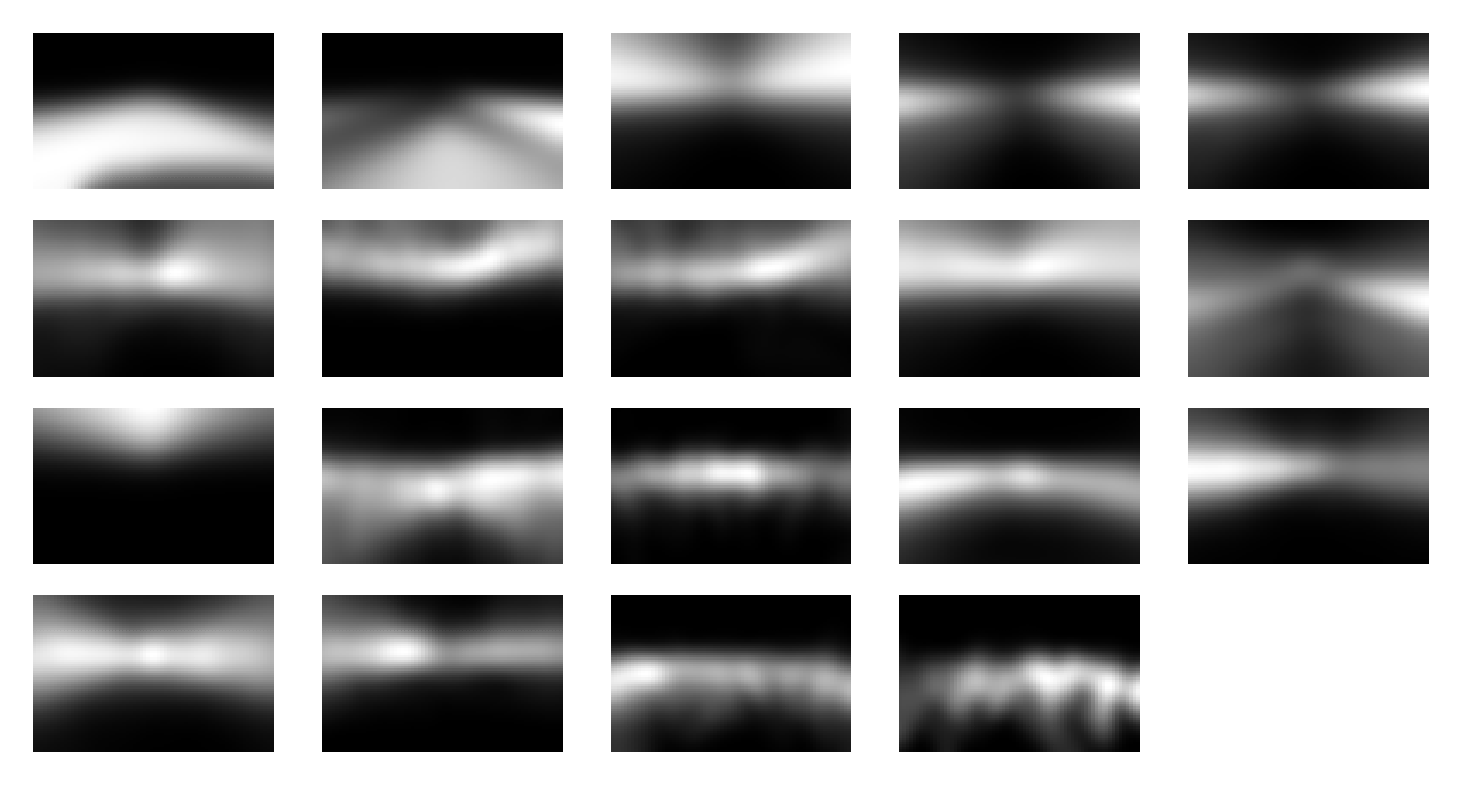

In [29]:

fig = plt.figure(dpi = 300)
for i in range(19):
#     print("num_classes %d amax = %s" % (i, np.amax(sp_prior[i])))
#     print("num_classes %d amin = %s" % (i, np.amin(sp_prior[i])))
    ax = fig.add_subplot(5, 5, i+1)
#     sns.heatmap(sp_prior[i]) # 生成熱力圖
    sns.heatmap(sp_prior[i], cbar=False, cmap="gray") # 生成熱力圖 不要右邊的value bar
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
#     ax.set_title(class_names[i])
fig.savefig(os.path.join(SAVE_DIR, "foreground_class_%s.png" % (color_map)))

# Save all images

c:\users\viplab\anaconda3\envs\xiao\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


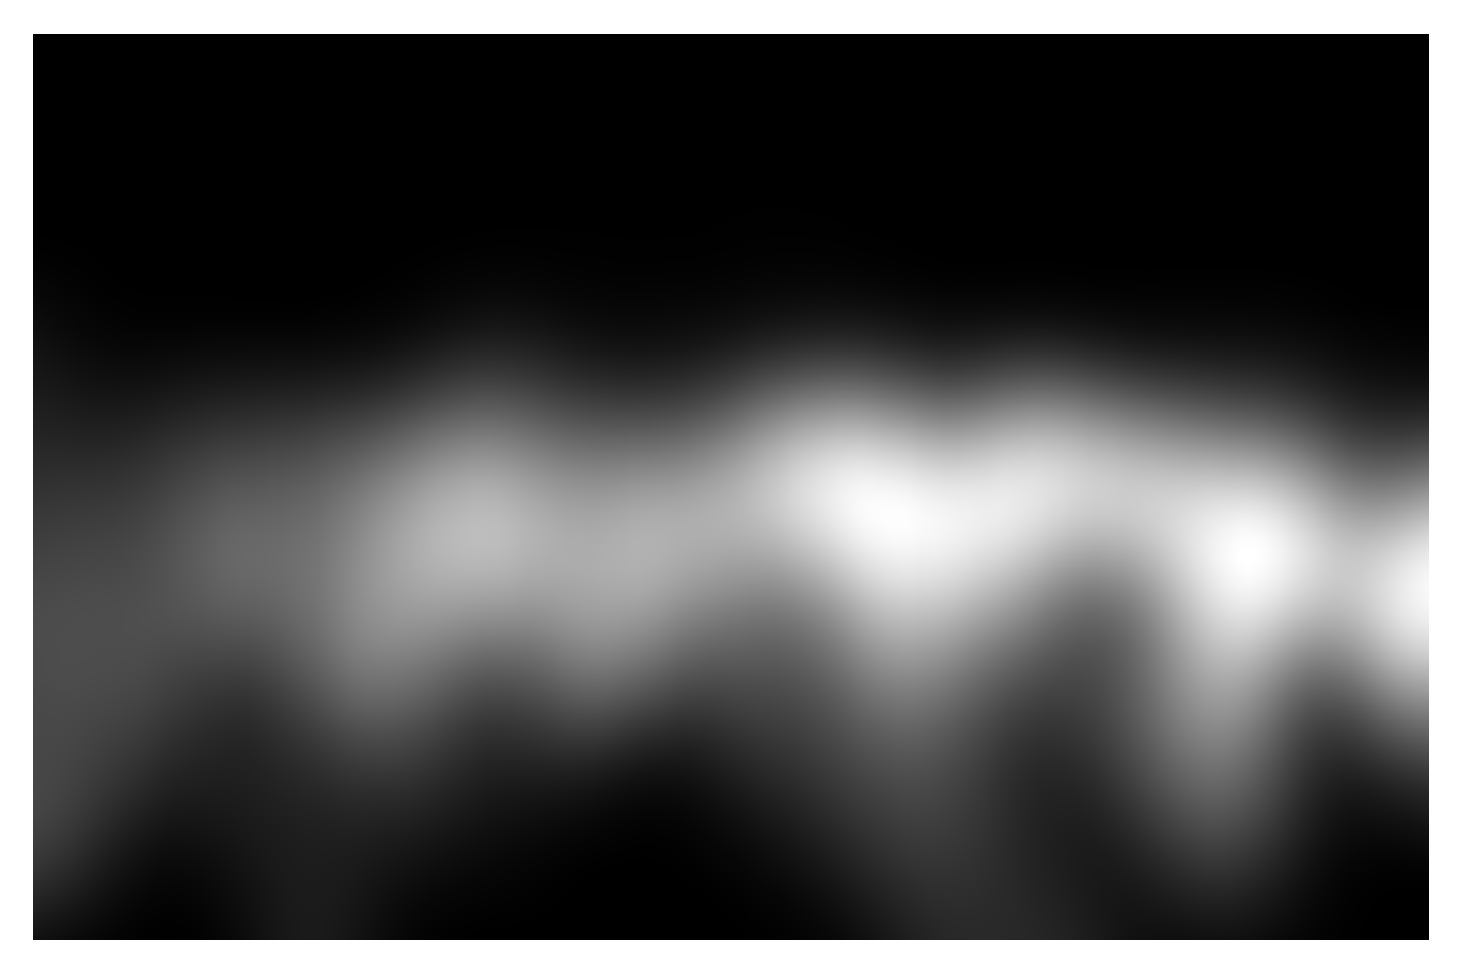

In [44]:
fig = plt.figure(dpi = 300)
for i in range(19):
    ax = fig.add_subplot(1, 1, 1)
#     sns.heatmap(sp_prior[i]) # 生成熱力圖
    sns.heatmap(sp_prior[i], cbar=False, cmap="gray") # 生成熱力圖 不要右邊的value bar
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    fig.savefig(os.path.join(SAVE_DIR, "each_classes_high-resolution", class_names[i] + "_%s.png" % (color_map)))